### Analisis Exploratorio de datos 
Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembr de 2017.

 Para estos dos datasets a
 ora necesitas

importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de da
os sean correctos
identificar los 10 principales barrios en términos de finalización del recorrido
hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
sacar conclusiones basadas en cada gráfico y explicar los resultados

# 1. Inicalizacion 

In [3]:
#Llamar a librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
from scipy import stats

# 2. Cargar Datos 

In [5]:
#Cargar a los archivos
companies=pd.read_csv('moved_project_sql_result_01.csv')
locations=pd.read_csv('moved_project_sql_result_04.csv')

In [6]:
#Mostrar informacion 
def info_data(datos):
    print('Primeras Filas')
    print(datos.head())
    print('Informacion General')
    print(datos.info())
    print('Datos nulos')
    print(datos.isna().sum())
    print('Datos Duplicados')
    print(datos.duplicated().sum())

In [7]:
info_data(companies)

Primeras Filas
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Datos nulos
company_name    0
trips_amount    0
dtype: int64
Datos Duplicados
0


In [8]:
info_data(locations)

Primeras Filas
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
Datos nulos
dropoff_location_name    0
average_trips            0
dtype: int64
Datos Duplicados
0


### Conclusion:
Los dos datasets tienen los datos limpios no hay datos nulos ni duplicados, al igual que el tipo de datos. 

## 3. Identificar los 10 principales barrios en términos de finalización del recorrido

In [11]:
ten_best_locations= locations.groupby('dropoff_location_name').agg({'average_trips':'sum'}).reset_index()

In [12]:
ten_best_locations= locations.sort_values(by='average_trips',ascending=False)

In [13]:
ten_best_locations= ten_best_locations.head(10)

In [14]:
ten_best_locations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


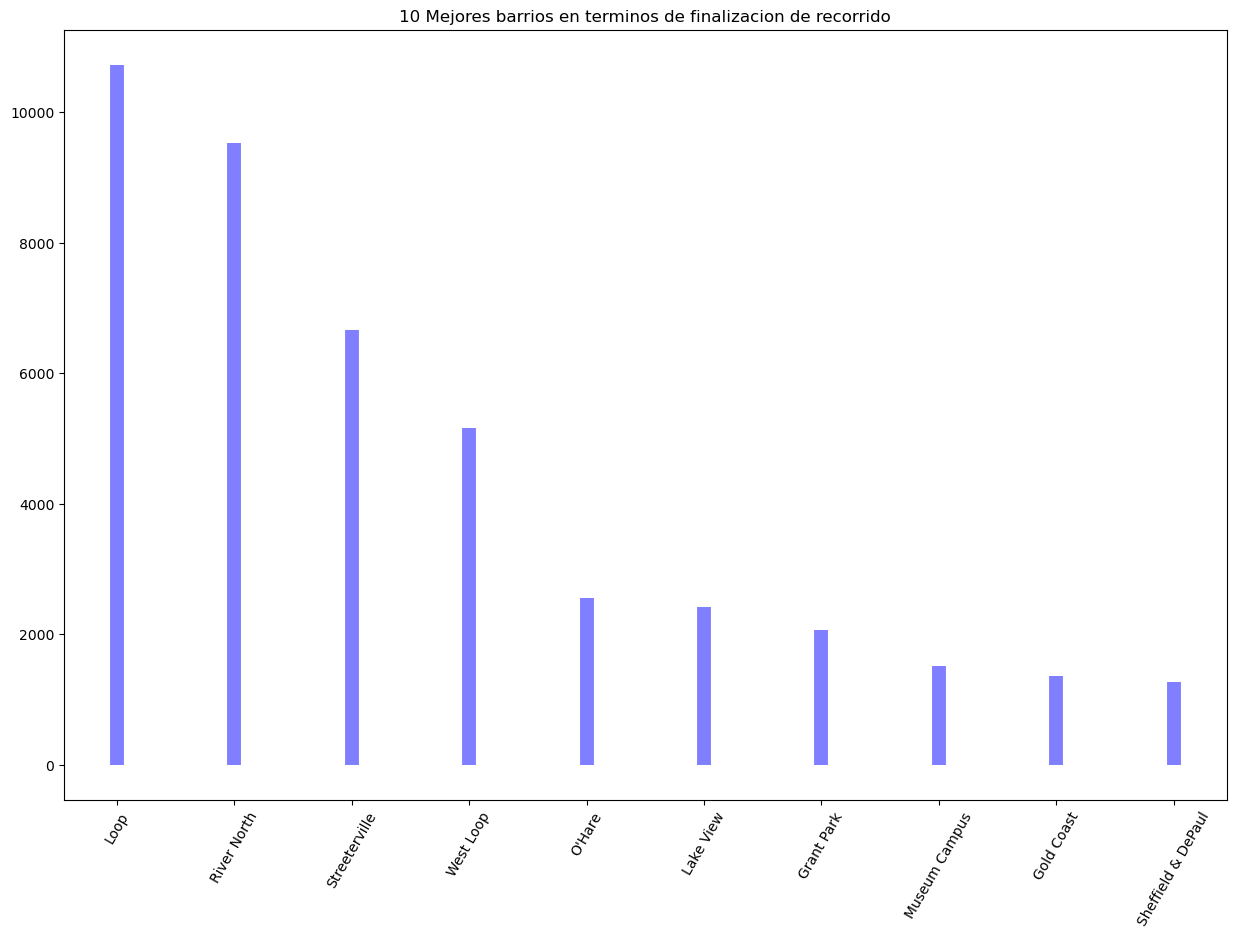

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=ten_best_locations.dropoff_location_name, ymin=0, ymax=ten_best_locations.average_trips, alpha=0.5, linewidth=10, color='blue')
ax.set_title('10 Mejores barrios en terminos de finalizacion de recorrido')
ax.set_xticks(ten_best_locations.dropoff_location_name)
ax.set_xticklabels(ten_best_locations.dropoff_location_name, rotation=60)
plt.show()

### Conclusion: 
El barrio Loop es la locacion con mayor promedio de viajes finalizados , de igual manera de los 10 mejores barrios 4 son los que superan mas de los 5000 como promedio de viajes posiblemente los barrios tienen sitios de interes para los usuarios que hacen uso del transporte en mayor cantidad durante el mes de Novimebre del 2017. 

## 4. Cuales son las 10 mejores compañias por numero de viajes?

In [18]:
ten_best_companies= companies.groupby('company_name').agg({'trips_amount':'sum'}).reset_index()

In [19]:
ten_best_companies= companies.sort_values(by='trips_amount',ascending=False)

In [20]:
ten_best_companies= companies.head(10)

In [21]:
ten_best_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


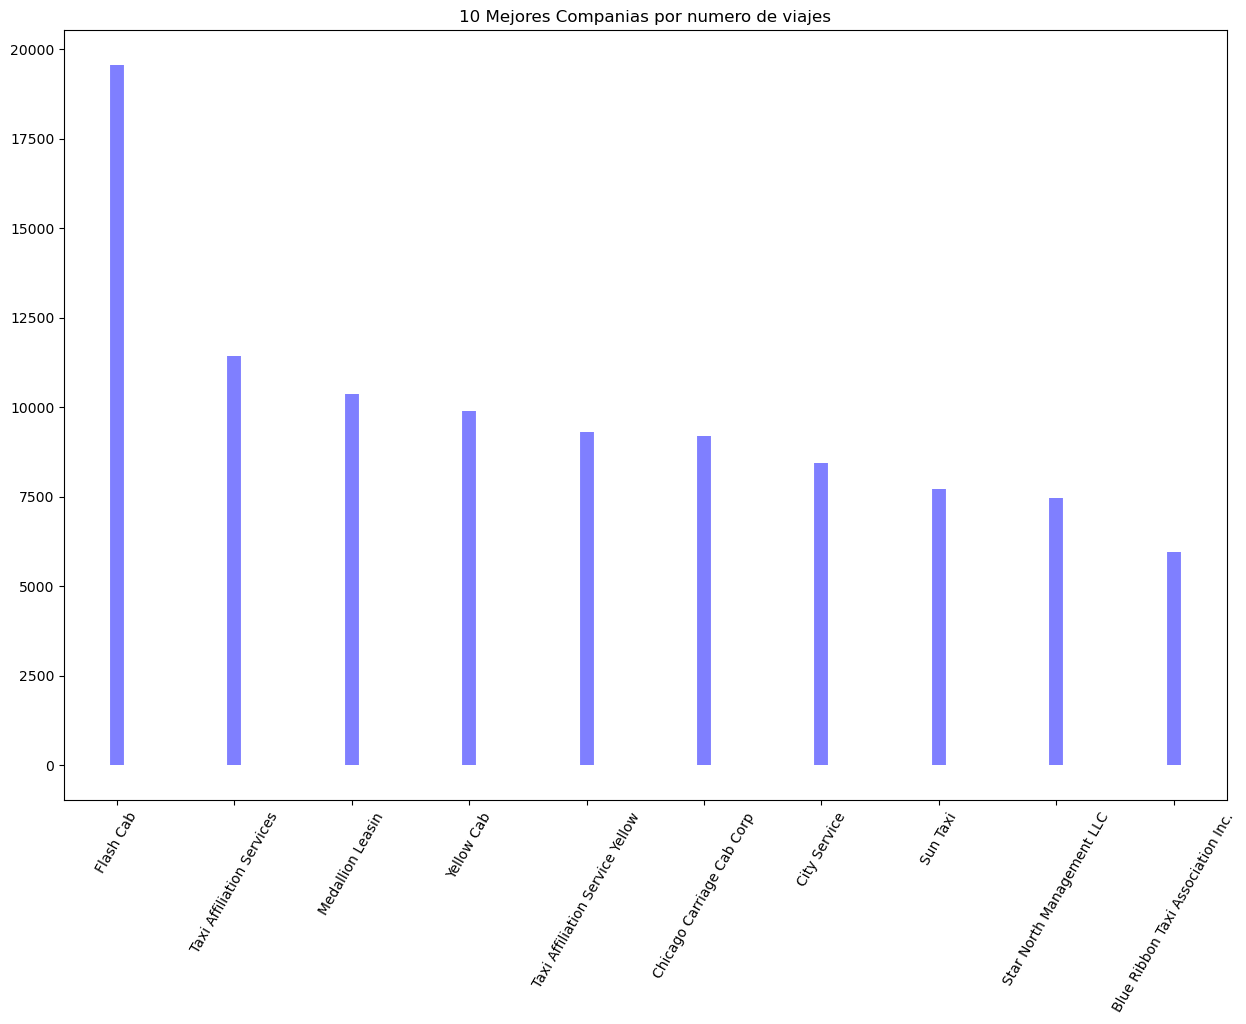

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=ten_best_companies.company_name, ymin=0, ymax=ten_best_companies.trips_amount, alpha=0.5, linewidth=10, color='blue')
ax.set_title('10 Mejores Companias por numero de viajes')
ax.set_xticks(ten_best_companies.company_name)
ax.set_xticklabels(ten_best_companies.company_name, rotation=60)
plt.show()

### Conclusion
La compañia FLash Cab se posiciona como mejor en cuanto a numero de viajes en el periodo del 15 al 16 de Diciembre, el resto de compañias van sobre los 7500 numero de viajes. 

## Prueba de Hipotesis 
/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 
Prueba la hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [25]:
#Cargar a los archivos
data=pd.read_csv('moved_project_sql_result_07.csv')

In [26]:
info_data(data)

Primeras Filas
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
Datos nulos
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64
Datos Duplicados
197


In [92]:
hyp_data_conditions= data.query('weather_conditions == "Good" or weather_conditions == "Bad"')

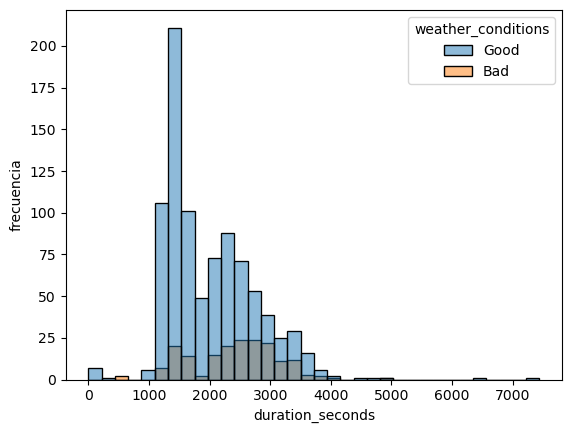

In [94]:
sns.histplot(hyp_data_conditions, x='duration_seconds', hue='weather_conditions')
plt.ylabel('frecuencia')
plt.xlabel('duration_seconds')
plt.show()

In [88]:
#Comprobar la duracion promedio por condicion climatica. 
data.groupby('weather_conditions')['duration_seconds'].mean()

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

In [96]:
#Prueba las hipótesis
#Crear variables por condicion climatica
Good = hyp_data_conditions.query('weather_conditions == "Good"')
Bad = hyp_data_conditions.query('weather_conditions == "Bad"')

In [112]:
#Prueba las hipótesis 
#Hipotesis Nula: Las diferencias entre el promedio de los dias Good y Bad son estadisticamente significativas, es decir son iguales.
#Hipotesis Alternativa: Las diferencias entre el promedio de los usuarios de Good y Bad NO son estadisticamente significativas, es decir son diferentes. 
#Definimos el valor alfa y el nivel de confianza.
alpha= 0.05
#Establecemos la hipotesis con una prueba estadistica ttest
resultados_hipotesis = stats.ttest_ind(
    Good['duration_seconds'], Bad['duration_seconds'], nan_policy='omit', equal_var=False).pvalue
if resultados_hipotesis > alpha:
    print("Las diferencias entre el promedio de los dias Good y Bad son estadisticamente significativas, es decir son iguales.")
else:
    print("Las diferencias entre el promedio de viajes de Good y Bad NO son estadisticamente significativas, es decir son diferentes.")

Las diferencias entre el promedio de viajes de Good y Bad NO son estadisticamente significativas, es decir son diferentes.


In [102]:
print(resultados_hipotesis)

6.738994326108734e-12


## Conclusion 

Se planteo la hipotesis nula de la siguiente manera Las diferencias entre el promedio de los usuarios de Good y Bad son estadisticamente significativas, es decir son iguales y uso el siguiente criterio para probar la hipotesis con una prueba de T Student para corroborar si la diferencia era significativa o no, lo cual si lo es, eso quiere decir que si afecta si hay dia lluviosos en condiciones malas lo que influye en el promedio de viajes desde Loop hasta el aeropuerto internacional. 